In [ ]:
!wget 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEglcmV1QHjv70EtAaYBUZ_sNH4ItvgbdmW-XIYWLemN5h-Vg_XSlmhwzhqL27yN2_Agz4JC3NWPshU4M3L6O-oG7fd8sann2ipM6YtH-rzBwTbuxC0_VdMQ9lHxkixSJ69lW-vx9miBaQdcdUQOX3sR627e7Lb61pLEsUiutq0Sh2gj3ezaGUlQhmLr8w/s400/hill_left.JPG'
!wget 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEh9uxgbhQorhxCxB8a4KSxw2kHQ46rE5stwqfOyryaaSSnVLbEeeV9RarDZwQWtjWS04y5w1apQii_H2B-r5nTkNd-ryqDrGuv1daZj_klhqWhwmzZPZUTi12UsUKH-4ijBRxK-kk6CFyehSqiEP8QsBvIVX47GnwYJl-mC9OfsFPlvlZhCXEQdSroPHw/s400/hill_right.JPG'

--2023-06-11 19:49:06--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEglcmV1QHjv70EtAaYBUZ_sNH4ItvgbdmW-XIYWLemN5h-Vg_XSlmhwzhqL27yN2_Agz4JC3NWPshU4M3L6O-oG7fd8sann2ipM6YtH-rzBwTbuxC0_VdMQ9lHxkixSJ69lW-vx9miBaQdcdUQOX3sR627e7Lb61pLEsUiutq0Sh2gj3ezaGUlQhmLr8w/s400/hill_left.JPG
Resolving blogger.googleusercontent.com (blogger.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to blogger.googleusercontent.com (blogger.googleusercontent.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41526 (41K) [image/jpeg]
Saving to: ‘hill_left.JPG’

hill_left.JPG       100%[===================>]  40.55K  --.-KB/s    in 0s      

2023-06-11 19:49:07 (144 MB/s) - ‘hill_left.JPG’ saved [41526/41526]

--2023-06-11 19:49:07--  https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEh9uxgbhQorhxCxB8a4KSxw2kHQ46rE5stwqfOyryaaSSnVLbEeeV9RarDZwQWtjWS04y5w1apQii_H2B-r5nTkNd-ryqDrGuv1daZj_klhqWhwmzZPZUTi12UsUKH-4ijBRxK-kk6CFye

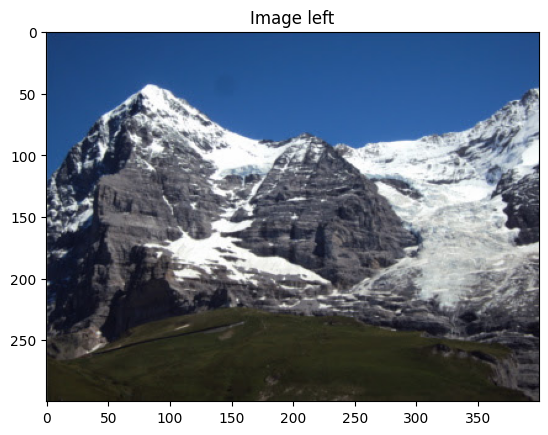

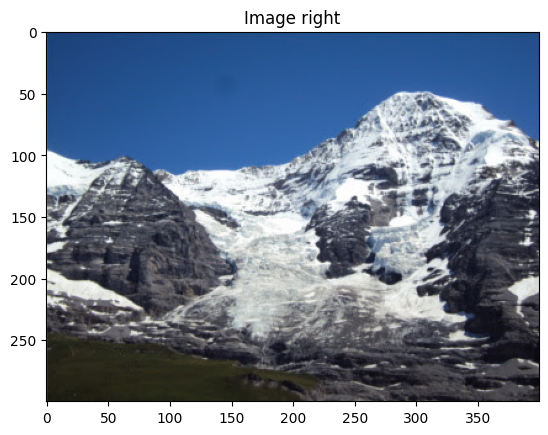

In [ ]:
# importing the needed classes to show and process the images
import cv2
from matplotlib import pyplot as plt
import numpy as np

# reading left image
left = cv2.imread('hill_left.JPG')
left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)               # converting it from BGR to RGB

# reading right image
right = cv2.imread('hill_right.JPG')
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)
right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)               # converting it from BGR to RGB

plt.imshow(left)
plt.title("Image left")
plt.show()

plt.imshow(right)
plt.title("Image right")
plt.show()

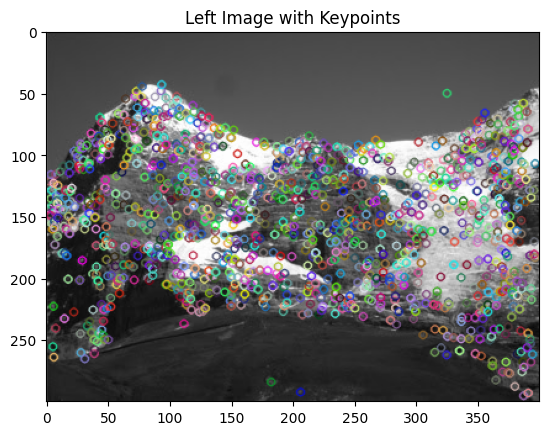

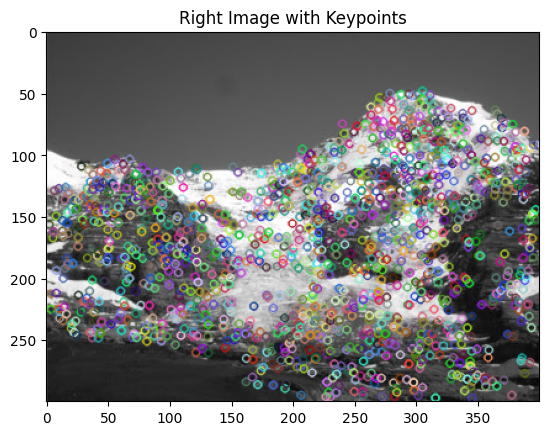

In [ ]:

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Compute keypoints and descriptors for left image
keypoints_left, descriptors_left = sift.detectAndCompute(left_gray, None)

# Compute keypoints and descriptors for right image
keypoints_right, descriptors_right = sift.detectAndCompute(right_gray, None)

# Draw keypoints on the images
left_keypoints = cv2.drawKeypoints(left_gray, keypoints_left, None)
right_keypoints = cv2.drawKeypoints(right_gray, keypoints_right, None)

# Display the images with keypoints
plt.imshow(left_keypoints)
plt.title("Left Image with Keypoints")
plt.show()

plt.imshow(right_keypoints)
plt.title("Right Image with Keypoints")
plt.show()

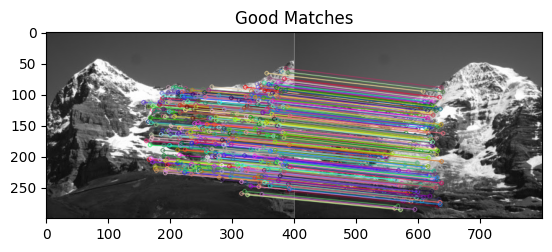

In [ ]:

# Initialize BFMatcher
bf = cv2.BFMatcher()

# Find matches using knnMatch
matches = bf.knnMatch(descriptors_left, descriptors_right, k=2)

# Apply ratio test and determine good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good_matches.append(m)

# Draw good matches
matching_result = cv2.drawMatches(left_gray, keypoints_left, right_gray, keypoints_right, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Visualize the good matches
plt.imshow(matching_result)
plt.title("Good Matches")
plt.show()

(300, 800, 3)


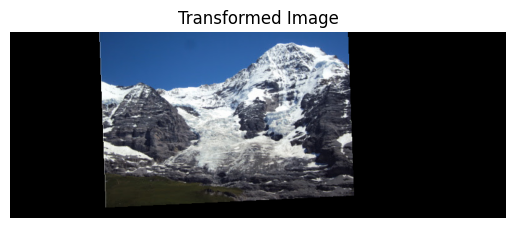

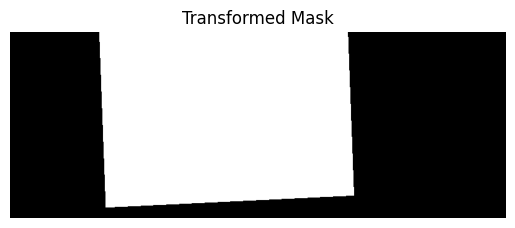

In [ ]:

# Extract matching keypoints coordinates
src_pts = np.float32([keypoints_left[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_right[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate affine geometric transform
M, _ = cv2.estimateAffine2D(src_pts, dst_pts)

# Transform the second image
transformed_image = cv2.warpAffine(right, M, (left.shape[1] + right.shape[1], max(left.shape[0], right.shape[0])), flags=cv2.WARP_INVERSE_MAP)

# Create a mask image
mask = np.ones_like(right_gray)

# Transform the mask image
transformed_mask = cv2.warpAffine(mask, M, (left.shape[1] + right.shape[1], max(left.shape[0], right.shape[0])), flags=cv2.WARP_INVERSE_MAP)

# Visualize the transformed second image and its mask
print(transformed_image.shape)

plt.imshow(transformed_image)
plt.axis("off")
plt.title("Transformed Image")
plt.show()

plt.imshow(transformed_mask, cmap='gray')
plt.axis("off")
plt.title("Transformed Mask")
plt.show()



(300, 800, 3)


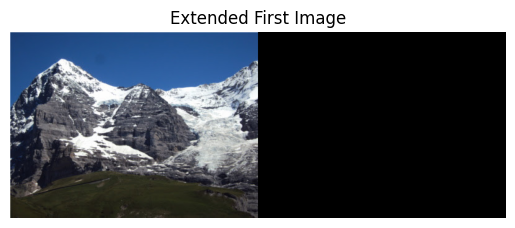

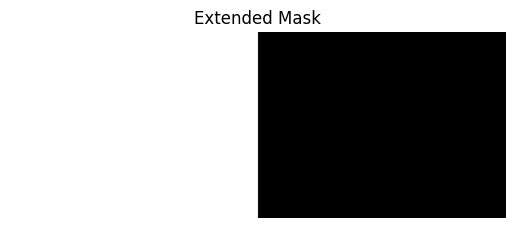

In [ ]:

# Extend the first image to match the dimensions of the transformed second image
extended_first = np.zeros_like(transformed_image)
extended_first[:left.shape[0], :left.shape[1]] = left

# Create a mask for the extended first image
extended_mask3 = np.zeros_like(transformed_image)
extended_mask3[:left.shape[0], :left.shape[1]] = 255

# Visualize the extended first image and its corresponding mask
print(extended_first.shape)

plt.imshow(extended_first)
plt.axis("off")
plt.title("Extended First Image")
plt.show()

plt.imshow(extended_mask3)
plt.axis("off")
plt.title("Extended Mask")
plt.show()



In [ ]:
def combineLeftRight(LImg, LMask, RImg, RMask):
    newImg = np.zeros_like(RImg)  # Birleştirilmiş görüntüyü depolamak için yeni bir görüntü oluştur

    # Grayscale maskeleri binay maskeye dönüştür
    Lret, Lthresh = cv2.threshold(LMask, 70, 255, cv2.THRESH_BINARY)
    Rret, Rthresh = cv2.threshold(RMask, 70, 255, cv2.THRESH_BINARY)

    for x in range(len(RImg)):
        for y in range(len(RImg[0])):
            if np.any(Lthresh[x, y]) and np.any(Rthresh[x, y]):
                newImg[x, y] = np.mean([LImg[x, y], RImg[x, y]])
            elif np.any(Lthresh[x, y]) and not np.any(Rthresh[x, y]):
                newImg[x, y] = LImg[x, y]
            else:
                newImg[x, y] = RImg[x, y]

    return newImg


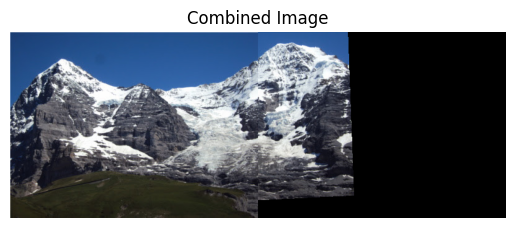

In [ ]:
# Combine the extended first image and transformed second image
combined_image = combineLeftRight(extended_first, extended_mask3, transformed_image, transformed_mask)

# Visualize the combination result
plt.imshow(combined_image)
plt.axis("off")
plt.title("Combined Image")
plt.show()